<a href="https://colab.research.google.com/github/prashant-karmare/PythonLearn/blob/main/Assignment13-AdvertiseLR/Advertise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Advertising.csv to Advertising (1).csv
User uploaded file "Advertising.csv" with length 4756 bytes
Size of our Data set is  (200, 5)
   no     x1    x2    x3     y
0   1  230.1  37.8  69.2  22.1
1   2   44.5  39.3  45.1  10.4
2   3   17.2  45.9  69.3   9.3
3   4  151.5  41.3  58.5  18.5
4   5  180.8  10.8  58.4  12.9
Length of X  (200, 3)
Length of Y  (200, 1)
Coefficients: 
 [[0.04489755 0.1846208  0.00256705]]
Mean squared error: 2.25
Coefficient of determination: 0.92
Value of R Square is :  1.0
Value of R rsquare2 is :  0.8967277222732413


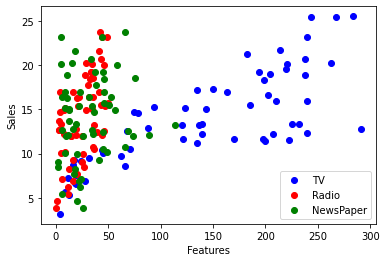

In [30]:
from google.colab import files
import numpy as np
#from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
#from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

uploadedfile = None
def uploadLocalFile():
  global uploadedfile
  uploaded = files.upload()
  #print('uploaded',uploaded)
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    #print('File**',uploaded[fn])
  return next(iter(uploaded)) 

 
def AdvertisePredict(Name):
    dataset = pd.read_csv(Name)
    print("Size of our Data set is ",dataset.shape)
    dataset.columns = ["no","x1", "x2","x3", "y"]
    print(dataset.head())
    X = dataset.iloc[:, 1:-1].values
    Y= dataset.iloc[:, -1:].values
    
    """"
    #print('X==',X.shape)
    #X = X.reshape((-1,1))
    TV =  X["TV"].values
    Radio = X["radio"].values
    NewsPaper= X["newspaper"].values
    FeatureDS = list(zip(TV,Radio,NewsPaper))
    """
    print("Length of X ",X.shape)
    print("Length of Y ",Y.shape)
  
  

    data_train,data_test,target_train,target_test = train_test_split(X,Y,test_size=0.3)
    
    obj = LinearRegression()
    obj.fit(data_train,target_train)
    
    output = obj.predict(data_test)
  
  
    print('Coefficients: \n', obj.coef_)
    print('Mean squared error: %.2f'% mean_squared_error(target_test, output))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'%r2_score(target_test, output))

    
    
    rsquare = obj.score(data_test,output)
    rsquare2 = obj.score(X,Y)
    print("Value of R Square is : ",rsquare)
    print("Value of R rsquare2 is : ",rsquare2)

    # Plot outputs
    
    plt.scatter(data_test[:,0:1], target_test,  color='blue', label ="TV")
    plt.scatter(data_test[:,1:2], output,  color='red', label ="Radio")
    plt.scatter(data_test[:,2:3], output,  color='green',label ="NewsPaper")
   
    plt.xlabel("Features")
    plt.ylabel("Sales")
    plt.legend()
    plt.show()

def main():
    #print("Enter File Name of dataSet : ")
    #filename = input()
    filename = uploadLocalFile()
    AdvertisePredict(filename)   
    #AdvertisePredict("Advertising.csv")
 
 
 
if __name__ == "__main__":
    main()


